In [1]:
import os
import sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:

cmds = pd.read_csv('../rec/cmds/commands.csv')
cmds.head()


,Command,Domain,Index_domain,Index_subset,Subset
0,disable Wifi,@wifi:,1,1,$m_disable:
1,turn off Wifi,@wifi:,1,1,$m_disable:
2,stop Wifi,@wifi:,1,1,$m_disable:
3,Wifi off,@wifi:,1,1,$m_disable:
4,turn off the Wifi,@wifi:,1,1,$m_disable:


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]
[11 11 82 60  9 10  8  9  6  6 25  7 28 20  9 18 14 17 12 11 10  8  8 15
 14  8  9 18  4  4  6 10 29  9  7  7  7  7 13 12 21 12 13  1  2 16  9  5]


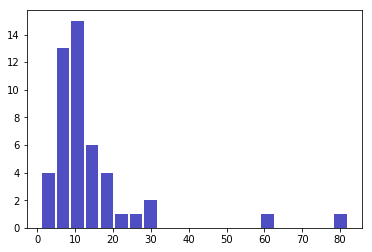

In [3]:
Cls, Words = cmds['Index_subset'], cmds['Command'] 
C,F = np.unique( Cls, return_counts=True)
cls2inx = { c:i for i,c in enumerate( C ) }

print(C)
print(F)

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=F, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)



In [8]:

filepath='../rec/cmds/dbcommand.csv'
db = [ { 'word':w, 'type':c} for c,w in zip( Cls, Words ) if F[ cls2inx[c] ] > 1  ]
db = pd.DataFrame( db )
db.to_csv(filepath, index=False, encoding='utf-8')


In [10]:
import random 

def get_pairs( dataset, n=5 ):
    
    pairs = [] 
    Cls, Words = dataset[:,0], dataset[:,1]
    C,F = np.unique( Cls, return_counts=True )
        
    for c,f in zip(C,F):         
        # a, b   
        a = np.array( np.random.choice( np.where(Cls==c)[0], min(f,n), replace=False ))
        b = np.array( np.random.choice( np.where(Cls==c)[0], min(f,n), replace=False ))
        #while np.any((a-b)==0): #aligning check
        while np.sum((a-b) == 0 )/b.shape[0] > 0.1: #aligning check
            random.shuffle(b) 
        pairs += zip(Words[a],Words[b])
        #print(c, a,b)
    
    random.shuffle(pairs)
    return pairs
    
db = pd.read_csv('../rec/cmds/dbcommand.csv')
db = db.values

pairs = get_pairs(db, n=2)
print( pairs[:10] )
print( len(pairs) )


[('start the four g network', 'enable three g connection'), ('turn ring volume up', 'increase ring volume'), ('Go to Homescreen', 'Go Homescreen'), ('disable torch', 'turn off torch'), ('Navigate back', 'Go back'), ('disable projector', 'turn projector off'), ('end', 'cancel'), ('What can you do', 'What Moto Voice can do'), ('projector on', 'activate projector'), ('turn up volume', 'increase volume')]
94


In [13]:
db = pd.read_csv('../rec/cmds/dbcommand.csv')
db

,type,word
0,1,disable Wifi
1,1,turn off Wifi
2,1,stop Wifi
3,1,Wifi off
4,1,turn off the Wifi
5,1,turn the Wifi off
6,1,stop Wifi
7,1,turn Wifi off
8,1,power Wifi off
9,1,power off Wifi
